In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from  sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [63]:
#all-wheel-drive (AWD), front wheel drive (FWD), rear wheel drive (RWD), and 4WD (4 wheel drive
#A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe
#multi point fuel injection (MPFI) system 
#bore-stroke ratio plays a vital part in the way it produces power
#An internal-combustion engine goes through four strokes: intake, compression, combustion (power), and exhaust
#City MPG refers to driving with occasional stopping and braking

dataset=pd.read_csv("../data/CarPrice.csv")
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21.0,27,13495.0
1,2,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21.0,27,16500.0
2,3,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000,19.0,26,16500.0
3,4,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500,24.0,30,13950.0
4,5,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500,18.0,22,17450.0


In [64]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):                                     #It convert the catorigcal and string data into numerical values to 
    for c in df.columns:                                        #interperate easily.
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [65]:
data1=labelencoder(dataset)                            #calling function of labelencoder
data1                                             #Visualization of data after performing labelencoder  technique

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3.0,3,2,1,2,1,3,1,88.6,...,130.0,6,3.47,2.68,9.0,111.0,5000,21.0,27,13495.0
1,2,3.0,4,2,1,2,1,3,1,88.6,...,130.0,6,3.47,2.68,9.0,111.0,5000,21.0,27,16500.0
2,3,1.0,2,2,1,2,3,3,1,94.5,...,152.0,6,2.68,3.47,9.0,154.0,5000,19.0,26,16500.0
3,4,2.0,5,2,1,1,4,2,1,99.8,...,109.0,6,3.19,3.40,10.0,102.0,5500,24.0,30,13950.0
4,5,2.0,6,2,1,1,4,0,1,99.4,...,136.0,6,3.19,3.40,8.0,115.0,5500,18.0,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1.0,139,2,1,1,4,3,1,109.1,...,141.0,6,3.78,3.15,9.5,114.0,5400,23.0,28,16845.0
201,202,-1.0,138,2,2,1,4,3,1,109.1,...,141.0,6,3.78,3.15,8.7,160.0,5300,19.0,25,19045.0
202,203,-1.0,140,2,1,1,4,3,1,109.1,...,173.0,6,3.58,2.87,8.8,134.0,5500,18.0,23,21485.0
203,204,-1.0,142,1,2,1,4,3,1,109.1,...,145.0,4,3.01,3.40,23.0,106.0,4800,26.0,27,22470.0


In [66]:
data1.isnull().sum()       # As we can see below that there are 4 5 columns that do not have 506 values, 
                         #which means they have some null values in them

car_ID              0
symboling           1
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           1
carlength           1
carwidth            1
carheight           3
curbweight          0
enginetype          0
cylindernumber      0
enginesize          1
fuelsystem          0
boreratio           3
stroke              0
compressionratio    3
horsepower          2
peakrpm             0
citympg             1
highwaympg          0
price               0
dtype: int64

In [67]:
Labels=data1['price']                        # It take salary column as a targeted label.
data=data1.drop('price',axis=1)             #It drop the salary column and consider all other values .

# Missing  data and NAN data

In [68]:
col = ['car_ID','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
for c in col:
    data[c].fillna(data[c].mean(),inplace=True)       #inplace=True’  make this change in our original dataset

# Normalization

In [69]:
from sklearn.preprocessing import MinMaxScaler

#Final_selected =  (Final_selected - Final_selected.mean()) / Final_selected.std()
scaler = MinMaxScaler(feature_range=(0, 1))                        #It normalized the whole dataset between 0 and 1.
Final_selected = scaler.fit_transform(data)

In [70]:
X_train, X_test,y_train, y_test = train_test_split(data,Labels, test_size=0.20,random_state=9)

In [71]:
print('training features =',X_train.shape)
print('testing features   =',y_train.shape)
print('training labels=',X_test.shape)
print('testing labels =',y_test.shape)

training features = (164, 25)
testing features   = (164,)
training labels= (41, 25)
testing labels = (41,)


Text(0.5, 1.0, 'Scatter Plot')

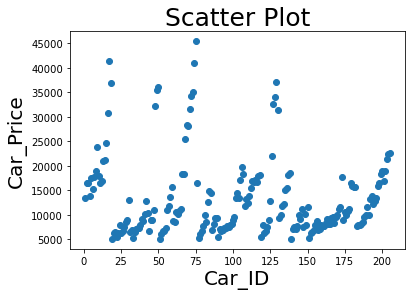

In [72]:
# Select variables and draw a scatter Plot 
x=data1[['car_ID']].values # predictor 
y=data1['price'].values #response or output variable
plt.scatter(x,y)
plt.xlabel('Car_ID' ,fontsize=20)
plt.ylabel('Car_Price',fontsize=20)
plt.title('Scatter Plot',fontsize=25)

## Choose Important Features

In [93]:
from sklearn.feature_selection import RFE

data2 = data1.dropna()

X = data2.drop('price', axis=1)
y = data2['price']

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
print(rfe.support_)
print(rfe.ranking_)

print(len(X_rfe[0]))
print(len(X.values[0]))

x_train, x_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2)

[False False False  True  True False  True  True  True False False  True
 False False False False False False False  True False False False False
 False]
[16  9 13  1  1 12  1  1  1  6 17  1 11 18 15  3  7  8  5  1  4 10 19  2
 14]
7
25


/Users/byungjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# Linear regression model

In [81]:
# creating a object
LR_Model = LinearRegression()
LR_Model.fit(x_train, y_train)
pred = LR_Model.predict(x_test)

In [82]:
# mse = mean_squared_error(y_test, pred)
# print('auracy', r2_score(y_test, pred)*100)

MAE: 2621.83939994843
MSE: 10799090.457432333
RMSE: 3286.196959622526


/Users/byungjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


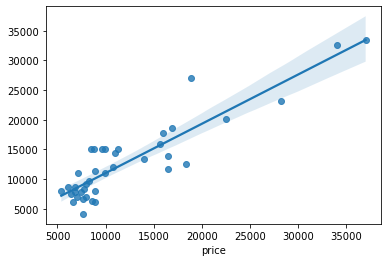

In [83]:
sns.regplot(y_test,pred, data=data1);
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [33]:
res = pd.DataFrame()
res['Y_Test'] = y_test
res['PRED'] = pred
res.head()

,Y_Test,PRED
172,17669.0,15939.173522
89,5499.0,15081.700147
55,10945.0,10768.570760
73,40960.0,40992.917387
158,7898.0,5531.459797


/Users/byungjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


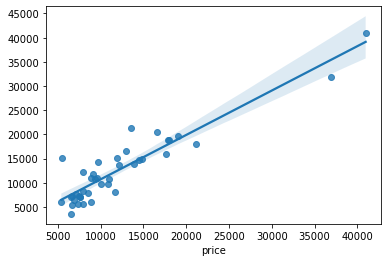

In [34]:
sns.regplot(y_test, pred, data=data1);

# Random Fores

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfc = RandomForestRegressor()
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
print('Random Forest accuracy is',metrics.r2_score(y_test,pred)*100)

Random Forest accuracy is 94.84744695323833


In [44]:
res = pd.DataFrame()
res['Y_Test'] = y_test
res['PRED'] = pred
res.head()

,Y_Test,PRED
172,17669.0,11856.190
89,5499.0,7761.525
55,10945.0,12774.200
73,40960.0,39807.700
158,7898.0,7837.660


MAE: 1179.0297073170734
MSE: 2742704.0072825374
RMSE: 1656.1111095824874


/Users/byungjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


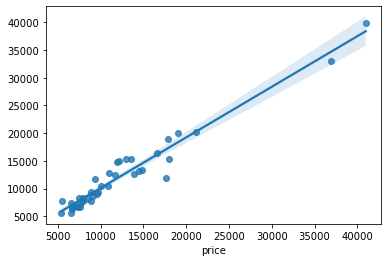

In [45]:
sns.regplot(y_test,pred, data=data1);
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


# Model SVR

In [46]:
#SVR Model
#r2_score regression score function
import seaborn as sns
from sklearn.svm import SVR
SVR_model=SVR(kernel ='linear')
SVR_model.fit(X_train,y_train)
pred=SVR_model.predict(X_test)

In [47]:
#model performance
from sklearn.metrics import r2_score

MAE: 2123.6067058137633
MSE: 8153285.083868115
RMSE: 2855.395784102112


/Users/byungjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


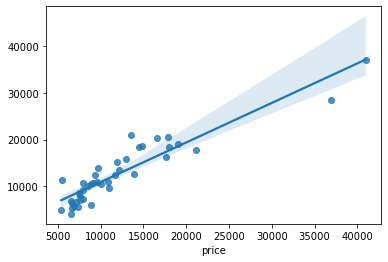

In [48]:
# print('Support vector regression accuracy is',r2_score(y_test,pred)*100)
sns.regplot(y_test,pred, data=data1);
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [49]:
res = pd.DataFrame()
res['y_test'] = y_test
res['pred'] = pred
res.head()

,y_test,pred
172,17669.0,16279.019497
89,5499.0,11349.093119
55,10945.0,9585.023456
73,40960.0,37110.595028
158,7898.0,7316.611121


/Users/byungjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


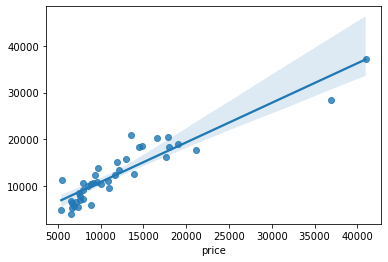

In [50]:
sns.regplot(y_test,
            pred, 
            data=data1);

# KNN Regressor

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
knn=KNeighborsRegressor(n_neighbors=int(4))
model_knn=knn.fit(X_train,y_train)
y_knn_pred=model_knn.predict(X_test)   
mse=metrics.mean_squared_error(y_test,y_knn_pred)

MAE: 2123.6067058137633
MSE: 8153285.083868115
RMSE: 2855.395784102112


/Users/byungjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


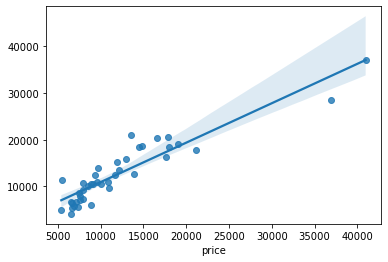

In [55]:
sns.regplot(y_test,pred, data=data1);
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))